In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [ ]:
# reading dataset

f1 = pd.read_csv("/content/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
f2 = pd.read_csv("/content/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
f3 = pd.read_csv("/content/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
f4 = pd.read_csv("/content/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
f5 = pd.read_csv("/content/Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [ ]:
df = pd.concat([f1,f2,f3,f4,f5])

In [ ]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
206658,2025-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1100888.0,62 years
206659,2025-04,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,988000.0,61 years 09 months
206660,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,975000.0,61 years 09 months
206661,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,1000000.0,61 years 09 months


In [ ]:
# remaining lease column is available only for 2 dataset, hence dropping it

df.drop('remaining_lease',axis=1,inplace=True)

In [ ]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
206658,2025-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1100888.0
206659,2025-04,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,988000.0
206660,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,975000.0
206661,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,1000000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952866 entries, 0 to 206662
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                952866 non-null  object 
 1   town                 952866 non-null  object 
 2   flat_type            952866 non-null  object 
 3   block                952866 non-null  object 
 4   street_name          952866 non-null  object 
 5   storey_range         952866 non-null  object 
 6   floor_area_sqm       952866 non-null  float64
 7   flat_model           952866 non-null  object 
 8   lease_commence_date  952866 non-null  int64  
 9   resale_price         952866 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 80.0+ MB


In [ ]:
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [ ]:
# the dataset does not have any null values
# moving ahead with the preprocess

Encoding the categorical columns

In [ ]:
# creating new column "address"

df['address'] = df['block'] + ' ' + df['street_name']

In [ ]:
# dropping the address and block columns

df.drop(['block','street_name'],axis=1,inplace=True)

In [ ]:
df.head(5)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,309 ANG MO KIO AVE 1
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1
2,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,309 ANG MO KIO AVE 1
3,1990-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1
4,1990-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,216 ANG MO KIO AVE 1


In [ ]:
# converting the month
df['month'] = pd.to_datetime(df['month'],format='%Y-%m')

In [ ]:
#splitting the month column

df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [ ]:
df.head(5)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,309 ANG MO KIO AVE 1,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1,1990
2,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,309 ANG MO KIO AVE 1,1990
3,1,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1,1990
4,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,216 ANG MO KIO AVE 1,1990


In [ ]:
  df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [ ]:
df['town'].nunique()

27

In [ ]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [ ]:
#normalising repeated values
df['flat_type'] = df['flat_type'].replace({'MULTI-GENERATION':'MULTI GENERATION'})

In [ ]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [ ]:
df['flat_type'].nunique()

7

In [ ]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [ ]:
#normalising repeated values

df['flat_model'] = df['flat_model'].str.lower()

In [ ]:
df['flat_model'].unique()

array(['improved', 'new generation', 'model a', 'standard', 'simplified',
       'model a maisonette', 'apartment', 'maisonette', 'terrace',
       '2 room', 'improved maisonette', 'multi generation',
       'premium apartment', 'adjoined flat', 'premium maisonette',
       'model a2', 'type s1', 'type s2', 'dbss', 'premium apartment loft',
       '3gen'], dtype=object)

In [ ]:
df['flat_model'].nunique()

21

In [ ]:
#using ordinal encoder for flat_type and flat_model and label encoder for town

df['town'] = LabelEncoder().fit_transform(df['town'])
df['flat_type'] = OrdinalEncoder().fit_transform(df[['flat_type']])
df['flat_model'] = OrdinalEncoder().fit_transform(df[['flat_model']])

In [ ]:
df['town'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [ ]:
df['flat_model'].unique()

array([ 5., 12.,  8., 17., 16.,  9.,  3.,  7., 18.,  0.,  6., 11., 13.,
        2., 15., 10., 19., 20.,  4., 14.,  1.])

In [ ]:
df['flat_type'].unique()

array([0., 2., 3., 4., 1., 5., 6.])

In [ ]:
#splitting the storey range column

df[['storey_start','storey_end']] = df['storey_range'].str.split('TO',expand=True)

In [ ]:
#dropping storey range column

df.drop('storey_range',axis=1,inplace=True)

In [ ]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end
0,1,0,0.0,31.0,5.0,1977,9000.0,309 ANG MO KIO AVE 1,1990,10,12
1,1,0,0.0,31.0,5.0,1977,6000.0,309 ANG MO KIO AVE 1,1990,04,06
2,1,0,0.0,31.0,5.0,1977,8000.0,309 ANG MO KIO AVE 1,1990,10,12
3,1,0,0.0,31.0,5.0,1977,6000.0,309 ANG MO KIO AVE 1,1990,07,09
4,1,0,2.0,73.0,12.0,1976,47200.0,216 ANG MO KIO AVE 1,1990,04,06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952866 entries, 0 to 206662
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                952866 non-null  int32  
 1   town                 952866 non-null  int64  
 2   flat_type            952866 non-null  float64
 3   floor_area_sqm       952866 non-null  float64
 4   flat_model           952866 non-null  float64
 5   lease_commence_date  952866 non-null  int64  
 6   resale_price         952866 non-null  float64
 7   address              952866 non-null  object 
 8   year                 952866 non-null  int32  
 9   storey_start         952866 non-null  object 
 10  storey_end           952866 non-null  object 
dtypes: float64(4), int32(2), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
#changing the data type of storey start and end

df['storey_start'] = df['storey_start'].astype(int)
df['storey_end'] = df['storey_end'].astype(int)

In [ ]:
# moving onto address

df['address'].nunique()

9913

In [ ]:
# applying label encoder since the unique values are high

df['address'] = LabelEncoder().fit_transform(df['address'])

In [ ]:
df

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end
0,1,0,0.0,31.0,5.0,1977,9000.0,3862,1990,10,12
1,1,0,0.0,31.0,5.0,1977,6000.0,3862,1990,4,6
2,1,0,0.0,31.0,5.0,1977,8000.0,3862,1990,10,12
3,1,0,0.0,31.0,5.0,1977,6000.0,3862,1990,7,9
4,1,0,2.0,73.0,12.0,1976,47200.0,2400,1990,4,6
...,...,...,...,...,...,...,...,...,...,...,...
206658,2,26,5.0,146.0,7.0,1988,1100888.0,9188,2025,10,12
206659,4,26,5.0,142.0,3.0,1987,988000.0,9468,2025,7,9
206660,4,26,5.0,146.0,7.0,1988,975000.0,9196,2025,4,6
206661,5,26,5.0,142.0,3.0,1988,1000000.0,9196,2025,4,6


In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end'],
      dtype='object')

In [ ]:
df_1 = df[['year','month','town','flat_type','flat_model','floor_area_sqm','lease_commence_date','storey_start','storey_end','resale_price','address']]

In [ ]:
# sorting the dataset according to year and month

df_1 = df_1.sort_values(by=['year','month'])

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df

,year,month,town,flat_type,flat_model,floor_area_sqm,lease_commence_date,storey_start,storey_end,resale_price,address
0,1990,1,0,0.0,5.0,31.0,1977,10,12,9000.0,3862
1,1990,1,0,0.0,5.0,31.0,1977,4,6,6000.0,3862
2,1990,1,0,0.0,5.0,31.0,1977,10,12,8000.0,3862
3,1990,1,0,0.0,5.0,31.0,1977,7,9,6000.0,3862
4,1990,1,0,2.0,12.0,73.0,1976,4,6,47200.0,2400
...,...,...,...,...,...,...,...,...,...,...,...
952861,2025,2,26,5.0,7.0,146.0,1988,10,12,1100888.0,9188
952862,2025,4,26,5.0,3.0,142.0,1987,7,9,988000.0,9468
952863,2025,4,26,5.0,7.0,146.0,1988,4,6,975000.0,9196
952864,2025,5,26,5.0,3.0,142.0,1988,4,6,1000000.0,9196


In [ ]:
# saving the file
df_1 = df.to_csv('final_dataset.csv',index=False)

In [ ]:
df_2= pd.read_csv('/content/final_dataset.csv')

In [ ]:
df_2

,year,month,town,flat_type,flat_model,floor_area_sqm,lease_commence_date,storey_start,storey_end,resale_price,address
0,1990,1,0,0.0,5.0,31.0,1977,10,12,9000.0,3862
1,1990,1,0,0.0,5.0,31.0,1977,4,6,6000.0,3862
2,1990,1,0,0.0,5.0,31.0,1977,10,12,8000.0,3862
3,1990,1,0,0.0,5.0,31.0,1977,7,9,6000.0,3862
4,1990,1,0,2.0,12.0,73.0,1976,4,6,47200.0,2400
...,...,...,...,...,...,...,...,...,...,...,...
952861,2025,2,26,5.0,7.0,146.0,1988,10,12,1100888.0,9188
952862,2025,4,26,5.0,3.0,142.0,1987,7,9,988000.0,9468
952863,2025,4,26,5.0,7.0,146.0,1988,4,6,975000.0,9196
952864,2025,5,26,5.0,3.0,142.0,1988,4,6,1000000.0,9196


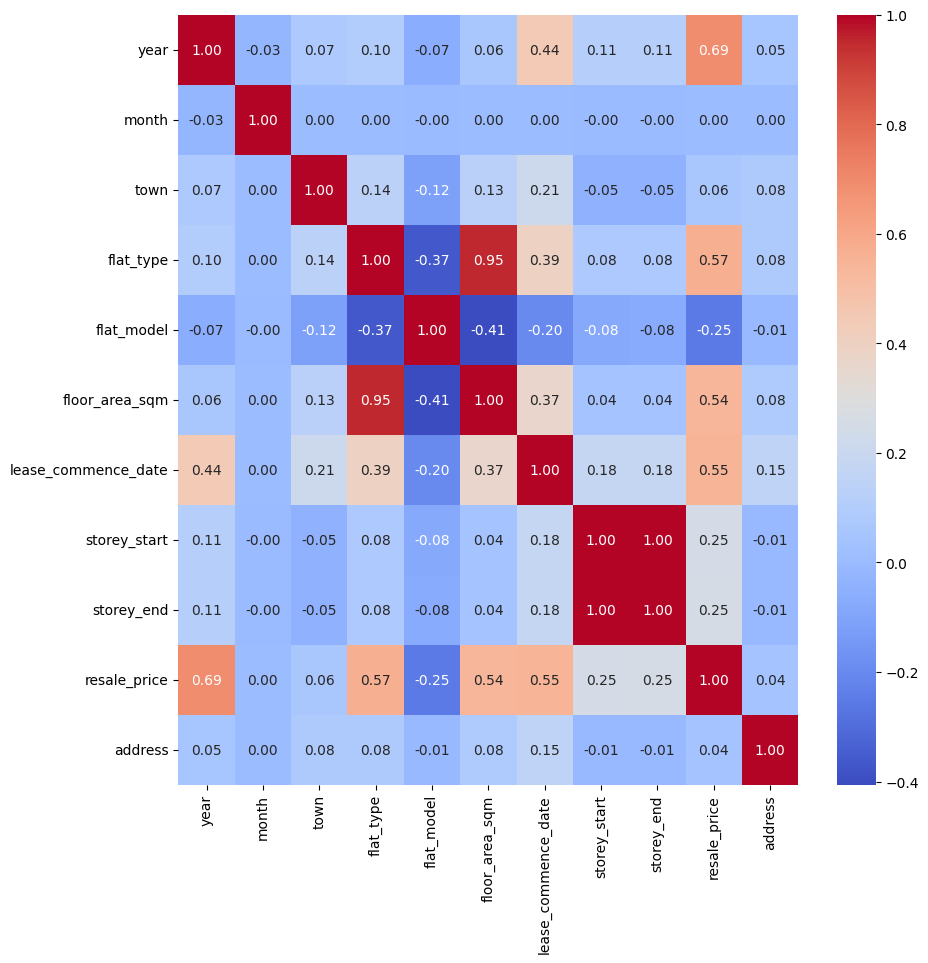

In [ ]:
# checking correlation between columns

df_corr = df_2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt="0.2f")
plt.show()

In [ ]:
# dropping month and address columns as they do not have much correlation with other columns

df_2.drop(['month','address'],axis=1,inplace=True)

In [ ]:
df_2

,year,town,flat_type,flat_model,floor_area_sqm,lease_commence_date,storey_start,storey_end,resale_price
0,1990,0,0.0,5.0,31.0,1977,10,12,9000.0
1,1990,0,0.0,5.0,31.0,1977,4,6,6000.0
2,1990,0,0.0,5.0,31.0,1977,10,12,8000.0
3,1990,0,0.0,5.0,31.0,1977,7,9,6000.0
4,1990,0,2.0,12.0,73.0,1976,4,6,47200.0
...,...,...,...,...,...,...,...,...,...
952861,2025,26,5.0,7.0,146.0,1988,10,12,1100888.0
952862,2025,26,5.0,3.0,142.0,1987,7,9,988000.0
952863,2025,26,5.0,7.0,146.0,1988,4,6,975000.0
952864,2025,26,5.0,3.0,142.0,1988,4,6,1000000.0


In [ ]:
# detecting skewed columns using box plot

def plot(df,col):
  plt.figure(figsize=(10,5))
  plt.subplot(1,3,1)
  sns.boxplot(df,x=col)
  plt.title("Box Plot"+" "+col)

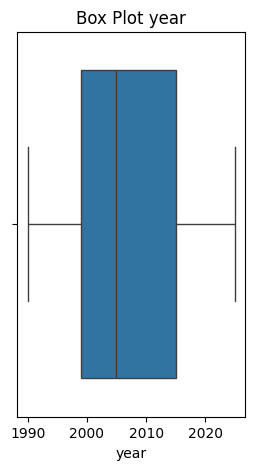

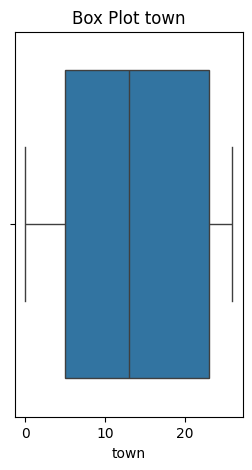

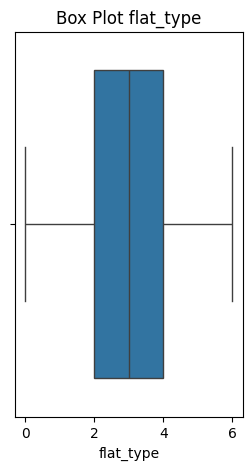

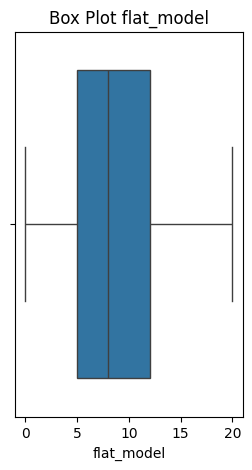

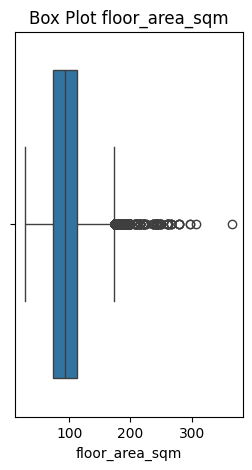

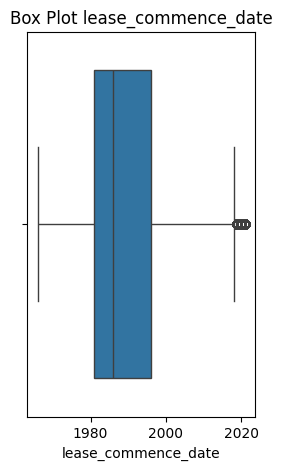

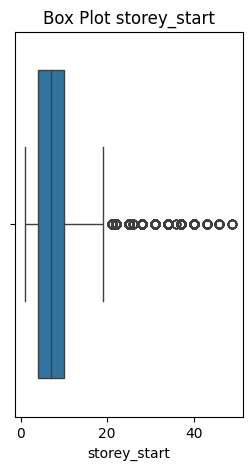

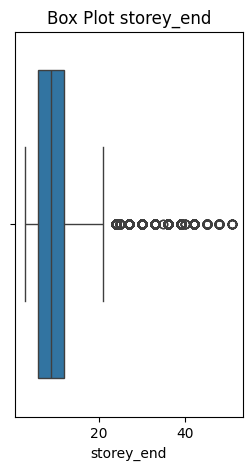

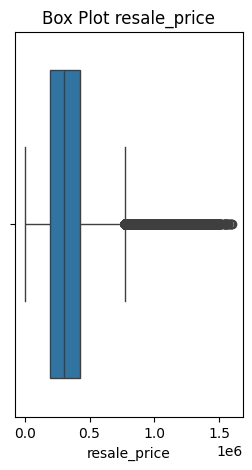

In [ ]:
for i in df_2.columns:
  plot(df_2,i)

In [ ]:
df_2.describe()

,year,town,flat_type,flat_model,floor_area_sqm,lease_commence_date,storey_start,storey_end,resale_price
count,952866.000000,952866.000000,952866.000000,952866.000000,952866.000000,952866.000000,952866.000000,952866.000000,9.528660e+05
mean,2006.659740,13.678570,3.014765,8.977535,95.673395,1988.545708,6.711349,8.725701,3.292015e+05
std,9.656126,8.785915,0.947644,3.853546,25.777099,10.934115,4.858578,4.858487,1.785138e+05
min,1990.000000,0.000000,0.000000,0.000000,28.000000,1966.000000,1.000000,3.000000,5.000000e+03
25%,1999.000000,5.000000,2.000000,5.000000,73.000000,1981.000000,4.000000,6.000000,1.960000e+05
50%,2005.000000,13.000000,3.000000,8.000000,93.000000,1986.000000,7.000000,9.000000,3.030000e+05
75%,2015.000000,23.000000,4.000000,12.000000,113.000000,1996.000000,10.000000,12.000000,4.270000e+05
max,2025.000000,26.000000,6.000000,20.000000,366.700000,2021.000000,49.000000,51.000000,1.600000e+06


#Skewness Handling

In [ ]:
# storey start, storey end and resale price columns seems to have lot of skewness

df_3 = df_2.copy()

In [ ]:
df_3['storey_start'].skew(),df_3['storey_end'].skew(),df_3['resale_price'].skew()

(np.float64(1.3714631778982054),
 np.float64(1.3720634103535057),
 np.float64(1.0012610145868583))

In [ ]:
df_3['storey_start'] = np.log(df_3['storey_start'])
df_3['storey_end'] = np.log(df_3['storey_end'])
df_3['resale_price'] = np.log(df_3['resale_price'])

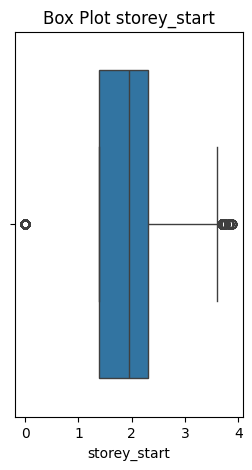

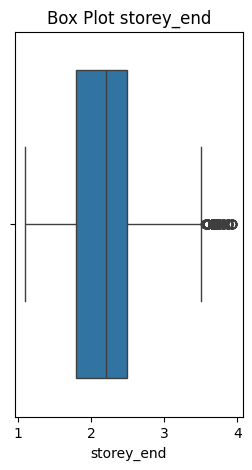

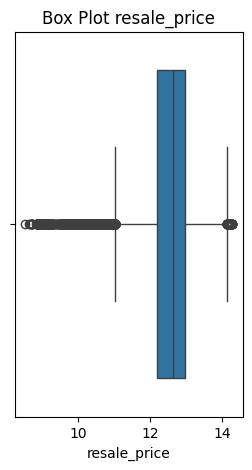

In [ ]:
skewed_col = ['storey_start','storey_end','resale_price']
for i in skewed_col:
  plot(df_3,i)

# outlier handling

In [ ]:
# outlier columns identified from box plot
# 1. floor area
# 2. storey start
# 3. storey end
# 4. resale price

In [ ]:
# setting boundaries for the dataset using IQR

def outlier(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1

  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR

  df[col] = df[col].clip(lower,upper)

In [ ]:
outlier_col = ['floor_area_sqm','storey_start','storey_end','resale_price']
for i in outlier_col:
  outlier(df_3,i)

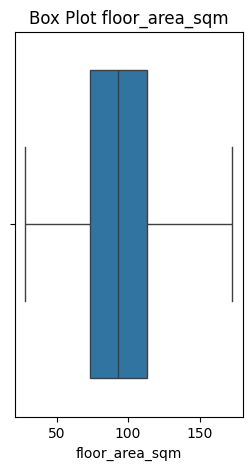

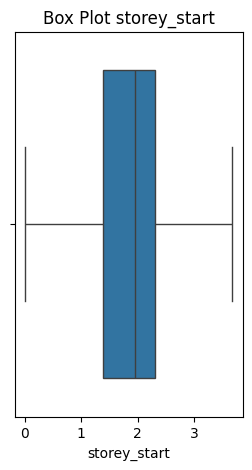

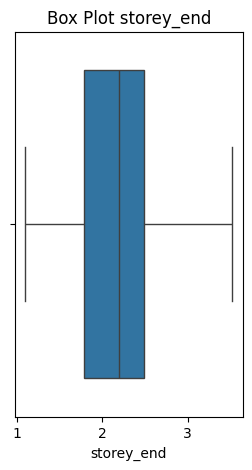

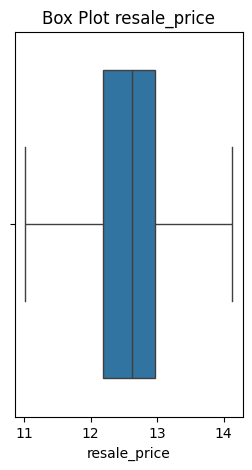

In [ ]:
for i in outlier_col:
  plot(df_3,i)

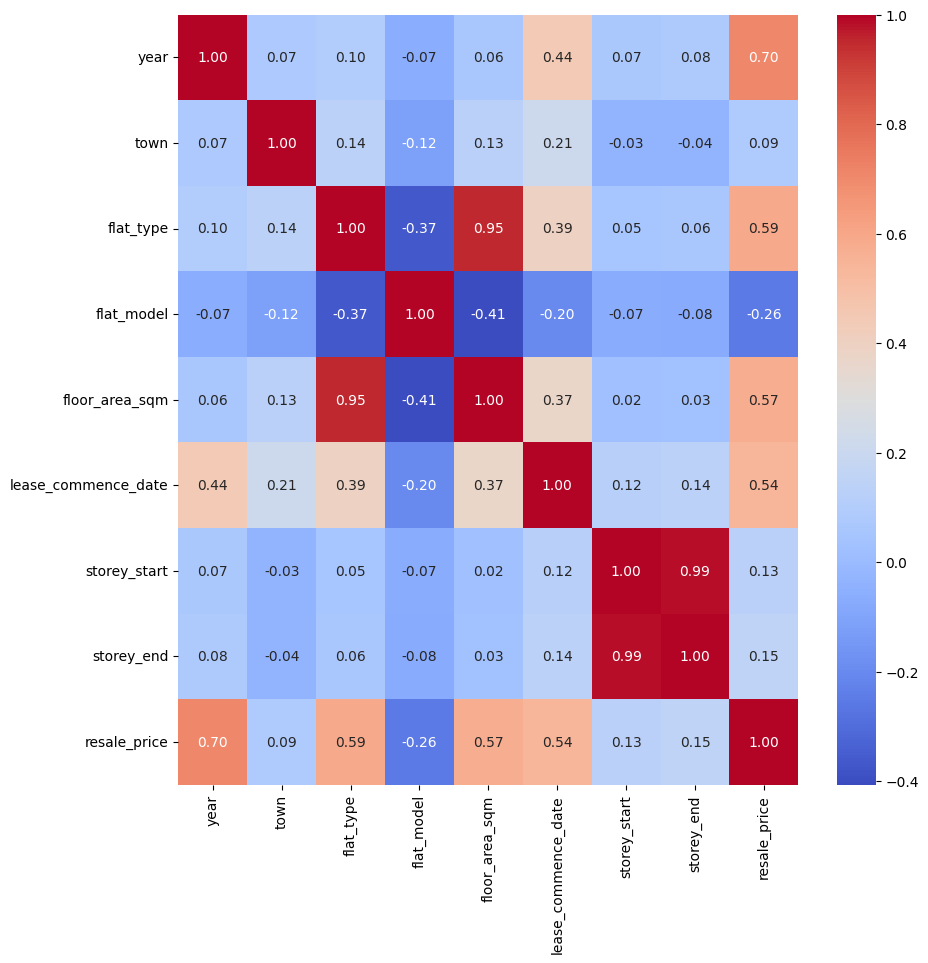

In [ ]:
# checking correlation after outlier correction
df_3_corr = df_3.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_3_corr,annot=True,cmap='coolwarm',fmt="0.2f")
plt.show()

# Model Selection

In [ ]:
df_final = df_3.copy()

In [ ]:
# creating model for resale price prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import pickle

In [ ]:
def model_selection(df,algorithm):
  x = df.drop('resale_price',axis=1)
  y = df['resale_price']

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

  model = algorithm().fit(x_train,y_train)
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  #checking accuracy score

  train_mse = mean_squared_error(y_train,y_pred_train)
  train_mae = mean_absolute_error(y_train,y_pred_train)
  train_r2 = r2_score(y_train,y_pred_train)
  train_rmse = np.sqrt(train_mse)

  test_mse = mean_squared_error(y_test,y_pred_test)
  test_mae = mean_absolute_error(y_test,y_pred_test)
  test_r2 = r2_score(y_test,y_pred_test)
  test_rmse = np.sqrt(test_mse)

  metrics_train = {"Data":"Train Data",
                   "Name":algorithm.__name__,
                   "r2_score":train_r2,
                   "mean_squared_error":train_mse,
                   "mean_absolute_error":train_mae,
                   "root_mean_squared_error":train_rmse}

  metrics_test = {"Data":"Test Data",
                   "Name":algorithm.__name__,
                   "r2_score":test_r2,
                   "mean_squared_error":test_mse,
                   "mean_absolute_error":test_mae,
                   "root_mean_squared_error":test_rmse}

  print(metrics_train)
  print(metrics_test)

In [ ]:
model_selection(df_final, LinearRegression)
model_selection(df_final, DecisionTreeRegressor)
model_selection(df_final, RandomForestRegressor)
model_selection(df_final, GradientBoostingRegressor)
model_selection(df_final, ExtraTreesRegressor)
model_selection(df_final, AdaBoostRegressor)
model_selection(df_final, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'r2_score': 0.7947896335268346, 'mean_squared_error': 0.0703489782572143, 'mean_absolute_error': 0.208156439401281, 'root_mean_squared_error': np.float64(0.2652338180873893)}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'r2_score': 0.7941968512126434, 'mean_squared_error': 0.07056074582846145, 'mean_absolute_error': 0.20844117046344718, 'root_mean_squared_error': np.float64(0.26563272732941146)}
{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'r2_score': 0.9892683788052291, 'mean_squared_error': 0.0036789495534297156, 'mean_absolute_error': 0.03673023677635968, 'root_mean_squared_error': np.float64(0.06065434488500981)}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'r2_score': 0.9720602641745053, 'mean_squared_error': 0.00957929268679004, 'mean_absolute_error': 0.06737580725182556, 'root_mean_squared_error': np.float64(0.09787386110085797)}
{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'r2_score': 0.9883

In [ ]:
# Randomforest it is

x = df_final.drop('resale_price',axis=1)
y = df_final['resale_price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)

test_mse = mean_squared_error(y_test,y_pred)
test_mae = mean_absolute_error(y_test,y_pred)
test_r2 = r2_score(y_test,y_pred)
test_rmse = np.sqrt(test_mse)

metrics_test = {"Data":"Test Data",
                   "Name":RandomForestRegressor.__name__,
                   "r2_score":test_r2,
                   "mean_squared_error":test_mse,
                   "mean_absolute_error":test_mae,
                   "root_mean_squared_error":test_rmse}

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'r2_score': 0.9773333289102575, 'mean_squared_error': 0.007771393328841588, 'mean_absolute_error': 0.061875481144776354, 'root_mean_squared_error': np.float64(0.08815550651457678)}


In [ ]:
# let's test the model

df_final.iloc[952853]

,952853
year,2025.000000
town,26.000000
flat_type,5.000000
flat_model,7.000000
floor_area_sqm,146.000000
lease_commence_date,1988.000000
storey_start,0.011858
storey_end,1.098612
resale_price,13.685402


In [ ]:
np.exp(13.685402)

np.float64(878000.1118420582)

In [ ]:
# saving the model

with open('singapore_flat_resale_model.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
with open('singapore_flat_resale_model.pkl','rb') as f1:
  xgbmodel = pickle.load(f1)

In [ ]:
user_data = np.array([[2025,26,5,7,146,1988,0.011858,1.098612]])
y_pred_1 = xgbmodel.predict(user_data)
np.exp(y_pred_1)

array([909208.79657665])